In [ ]:
import json
from PIL import Image
import cv2
import numpy as np

def jsonreader(jsonpath, mode=1, convertRGB=True):
    """
    json파일을 해석해서 이미지와 함께 출력한다.
    jsonpath json파일의 위치를 입력한다.
    mode 
    1 = img, mask(2D, 0~1)를 함께 return한다. (array) 출력값 2개
    2 = img, mask(3D, 0~1)를 함께 return한다. (array) 출력값 2개
    3 = img, mask(2D, 0~255)를 함께 return한다. (array) 출력값 2개
    4 = img, mask(3D, 0~255)를 함께 return한다. (array) 출력값 2개
    5 = img를 cut하여 return한다. (array) 출력값 1개
    6 = img, mask를 함께 return한다. (image) 출력값 2개
    7 = img에 mask를 씌워서 return한다. (image) 출력값 1개
    8 = img를 cut하여 return한다. (image) 출력값 1개
    convertRGE
    True = RGB로 출력
    False = BGR로 출력
    """
    imgpath = jsonpath.replace('.json','').replace('labeling', 'train').replace('new/','')
    with open(jsonpath) as read_json:
        jsonfile= eval(json.load(read_json))
    size = jsonfile['size']
    try:
        x0 = int(jsonfile['out_line']['x0'])
        x1 = int(jsonfile['out_line']['x1'])
        y0 = int(jsonfile['out_line']['y0'])
        y1 = int(jsonfile['out_line']['y1'])
    except:
        x0 = y0 = 0
        x1 = jsonfile['size'][0]
        y1 = jsonfile['size'][1]
    mask = np.zeros(size)
    mask[x0:x1,y0:y1] = 1
    img = cv2.imread(imgpath)
    if convertRGB: 
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    if mode == 1 :
        return img, mask

    elif mode == 2 :
        return img, np.dstack([mask, mask, mask])

    elif mode == 3 :
        return img, mask * 255

    elif mode == 4 :
        return img, np.dstack([mask, mask, mask]) * 255

    elif mode == 5 :
        return img[x0:x1,y0:y1]

    elif mode == 6 :
        return Image.fromarray((img).astype('u1')), Image.fromarray((255*mask).astype('u1'))

    elif mode == 7 :
        return Image.fromarray((img*np.dstack([mask, mask, mask])).astype('u1'))

    elif mode == 8 :
        return Image.fromarray((img[x0:x1,y0:y1]).astype('u1'))

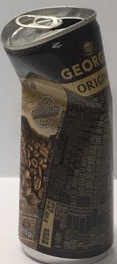

In [ ]:
jsonreader('/content/drive/MyDrive/deeplearning_file/recyclable_materials/labeling/can/new/KakaoTalk_20191104_185434943_06.jpg.json', mode=8, convertRGB=True)

In [ ]:
import os
plastic = os.listdir('/content/drive/MyDrive/deeplearning_file/recyclable_materials/labeling/plastic/new/')
can = os.listdir('/content/drive/MyDrive/deeplearning_file/recyclable_materials/labeling/can/new/')
paper = os.listdir('/content/drive/MyDrive/deeplearning_file/recyclable_materials/labeling/paper/new/')
glass = os.listdir('/content/drive/MyDrive/deeplearning_file/recyclable_materials/labeling/glass/new/')

In [ ]:
files = [ can, paper, glass,plastic]
folders = [ 'can/', 'paper/', 'glass/','plastic/']

In [ ]:
for i in range(4):
    for file in files[i]:
        try : 
            img = jsonreader("/content/drive/MyDrive/deeplearning_file/recyclable_materials/labeling/" + folders[i] + 'new/'  + file, mode=8)
            img.save("/content/drive/MyDrive/deeplearning_file/recyclable_materials/labeling_Img/" + folders[i] + file.replace('.json','') ,'JPEG')
        except:
            pass